In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

### Part 2: Exploratory Data Analysis
Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:  
    a. How often does the candidate who raised more money win a race?  
    b. How often does the candidate who spent more money win a race?  
    c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?  
    d. How often does the incumbent candidate win a race?  
    e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [2]:
#reading in the csv that was created.
House_of_Rep = pd.read_csv('../data/HOR_2020.CSV')
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234
...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567


a. How often does the candidate who raised more money win a race?

In [3]:
#All the candidates that won their race
House_of_Rep[House_of_Rep['Winner']==True]

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234
6,Robert B Aderholt,(R),Alabama,District 04,True,True,82.5,1255076,1323812,647004
7,Mo Brooks,(R),Alabama,District 05,True,True,95.8,655365,210045,1137501
...,...,...,...,...,...,...,...,...,...,...
872,Scott Fitzgerald,(R),Wisconsin,District 05,False,True,60.2,1155721,968406,187315
874,Glenn Grothman,(R),Wisconsin,District 06,True,True,59.3,1815756,1736659,269431
876,Tom Tiffany,(R),Wisconsin,District 07,True,True,60.8,2637459,2514740,122719
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362


In [ ]:
House_of_Rep[House_of_Rep['Winner']==True]

In [4]:
#The candidate who raised the most in their district race
House_of_Rep['Raised Ranked'] = House_of_Rep.groupby(['State','District'])['Raised'].rank(ascending = False)
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0
...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0


In [5]:
#Creating a column that seperating those who raised the most from those who did not using True or False.
House_of_Rep['Top Raised'] = np.where(House_of_Rep['Raised Ranked'] == 1.0, True, False)
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0,True


In [6]:
#Crosstabe shows how often the candidate who raised the most, also won their race.
CrosstabResult = pd.crosstab(index=House_of_Rep['Top Raised'], columns= House_of_Rep['Winner'])
CrosstabResult

Winner,False,True
Top Raised,,
False,402,47
True,51,382


In [7]:
#The number of candidate that raised the most and won their race divided by the total number of races.
382/433

0.8822170900692841

**88% of the time, the candidate that raised the most money is the candidate that wins the race.**

b. How often does the candidate who spent more money win a race?

In [8]:
#Creating a column that shows the candidates that spent the most with 1.
House_of_Rep['Spent Ranked'] = House_of_Rep.groupby(['State','District'])['Spent'].rank(ascending = False)

In [9]:
#A column that seperates the candidates that spent the most with True and the others with False
House_of_Rep['Top Spent'] = np.where(House_of_Rep['Spent Ranked'] == 1.0, True, False)
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False,2.0,False
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True,1.0,True
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False,2.0,False
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0,True,1.0,True


In [10]:
#Crosstabe shows how often the candidate that spent the most were the winners of their race.
raised_winner_crosstab = pd.crosstab(index=House_of_Rep['Top Spent'], columns= House_of_Rep['Winner'])
raised_winner_crosstab

Winner,False,True
Top Spent,,
False,399,50
True,54,379


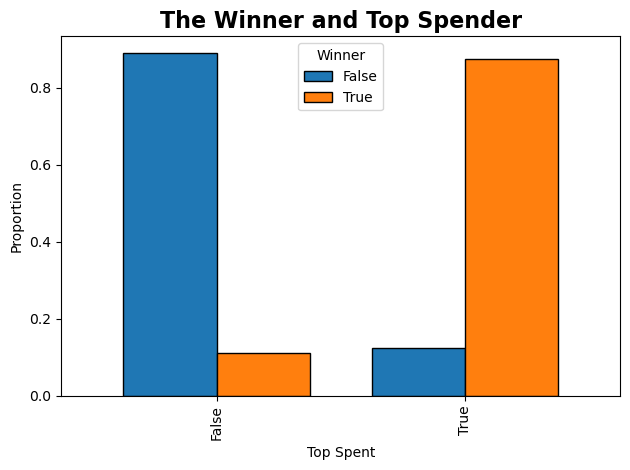

In [79]:
pd.crosstab(index = House_of_Rep['Top Spent'],
            columns = House_of_Rep['Winner'],
           normalize = 'index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75);
plt.ylabel('Proportion');
plt.title('The Winner and Top Spender', fontsize = 16, fontweight = 'bold');
plt.tight_layout()
plt.savefig('../assets/TopSpentWinner.png', dpi = 150);

In [11]:
#The total amount of candidates that spent the most during their race divided by the total amount of races.
379/433

0.8752886836027713

**87% of the time the candidate that spent the most has one the race**

c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?


In [12]:
House_of_Rep.head(5)

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True,1.0,True


In [13]:
House_of_Rep['Raised'] - House_of_Rep['Spent']

0      111972
1        1122
2      -18561
3          62
4      -25453
        ...  
877     29267
878    361104
879     17062
880    -56284
881      2362
Length: 882, dtype: int64

d. How often does the incumbent candidate win a race?

In [14]:
#Crosstab shows how often an Incumbent wins their race.
Incumbent_winner_crosstab = pd.crosstab(index=House_of_Rep['Incumbent'], columns= House_of_Rep['Winner'])
Incumbent_winner_crosstab

Winner,False,True
Incumbent,,
False,438,59
True,15,370


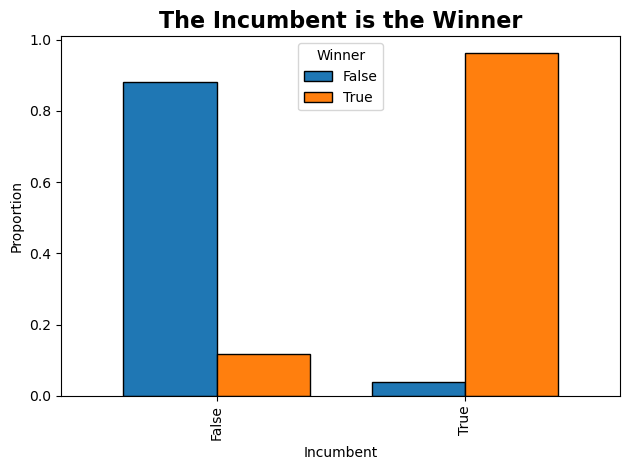

In [83]:
pd.crosstab(index = House_of_Rep['Incumbent'],
            columns = House_of_Rep['Winner'],
           normalize = 'index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75);
plt.ylabel('Proportion');
plt.title('The Incumbent is the Winner', fontsize = 16, fontweight = 'bold');
plt.tight_layout()
plt.savefig('../assets/IncumbentWins.png', dpi = 150);

In [16]:
#The number of Incumbents that won their race divided by the total amount races where an incumbent was a candidate.
370/385

0.961038961038961

96% of the time where an incumbent was present in the race they were the winner.

e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [17]:
House_of_Rep[['Incumbent', 'Raised']].corr()

,Incumbent,Raised
Incumbent,1.000000,0.271196
Raised,0.271196,1.000000


**MY EDA**

In [18]:
House_of_Rep['Party'].unique()

array(['(R)', '(D)', '(I)', '(3)', '(L)'], dtype=object)

In [21]:
House_of_Rep_Winners = House_of_Rep[House_of_Rep['Winner']== True].reset_index()
House_of_Rep_Winners

,index,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True,1.0,True
2,4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True,1.0,True
3,6,Robert B Aderholt,(R),Alabama,District 04,True,True,82.5,1255076,1323812,647004,1.0,True,1.0,True
4,7,Mo Brooks,(R),Alabama,District 05,True,True,95.8,655365,210045,1137501,1.0,True,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,872,Scott Fitzgerald,(R),Wisconsin,District 05,False,True,60.2,1155721,968406,187315,1.0,True,1.0,True
425,874,Glenn Grothman,(R),Wisconsin,District 06,True,True,59.3,1815756,1736659,269431,1.0,True,1.0,True
426,876,Tom Tiffany,(R),Wisconsin,District 07,True,True,60.8,2637459,2514740,122719,1.0,True,1.0,True
427,878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True,1.0,True


In [38]:
House_of_Rep_Winners['Spent'].mean()

2349684.8974358975

In [120]:
House_of_Rep_Winners['Raised'].mean()

2710275.1585081583

In [39]:
House_of_Rep_Winners['Spent'].max()

Spent    32830607
dtype: int64

In [121]:
House_of_Rep_Winners['Raised'].max()

37262827

In [82]:
House_of_Rep_Winners['Raised'].min()

257174

In [122]:
House_of_Rep_Winners['Spent'].min()

95065

In [ ]:
House_of_Rep_Winners.sort_

In [22]:
House_of_Rep_Losers = House_of_Rep[House_of_Rep['Winner'] == False].reset_index()
House_of_Rep_Losers

,index,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False,2.0,False
1,3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False,2.0,False
2,5,Adia Winfrey,(D),Alabama,District 03,False,False,32.4,50273,40971,43,2.0,False,2.0,False
3,11,Alyse Galvin,(I),Alaska,District 01,False,False,45.3,5178452,5088103,96594,1.0,True,1.0,True
4,13,Tiffany Shedd,(R),Arizona,District 01,False,False,48.4,1675618,1615704,63347,2.0,False,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,873,Tom Palzewicz,(D),Wisconsin,District 05,False,False,39.9,370392,371799,0,2.0,False,2.0,False
449,875,Jessica King,(D),Wisconsin,District 06,False,False,40.7,287753,245788,41965,2.0,False,2.0,False
450,877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False,2.0,False
451,879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False,2.0,False


In [45]:
Expensive_Winner_Campaign = House_of_Rep_Winners.sort_values('Spent', ascending = False).head(6)
Expensive_Winner_Campaign 

,index,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
170,342,Steve Scalise,(R),Louisiana,District 01,True,True,72.2,37262827,32830607,6217720,1.0,True,1.0,True
43,79,Kevin McCarthy,(R),California,District 23,True,True,62.1,27780644,24265583,4802133,1.0,True,1.0,True
32,59,Nancy Pelosi,(D),California,District 12,True,True,77.6,27359508,22064953,6299373,1.0,True,1.0,True
42,77,Devin Nunes,(R),California,District 22,True,True,54.2,26825212,20156093,10908033,1.0,True,1.0,True
356,720,Dan Crenshaw,(R),Texas,District 02,True,True,55.6,19427865,17596329,1852715,1.0,True,1.0,True
266,535,Alexandria Ocasio-Cortez,(D),New York,District 14,True,True,68.7,20664795,16735422,4297383,1.0,True,1.0,True


In [53]:
House_of_Rep_Winners.sort_values('Raised', ascending = False).head(5)

,index,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
170,342,Steve Scalise,(R),Louisiana,District 01,True,True,72.2,37262827,32830607,6217720,1.0,True,1.0,True
43,79,Kevin McCarthy,(R),California,District 23,True,True,62.1,27780644,24265583,4802133,1.0,True,1.0,True
32,59,Nancy Pelosi,(D),California,District 12,True,True,77.6,27359508,22064953,6299373,1.0,True,1.0,True
42,77,Devin Nunes,(R),California,District 22,True,True,54.2,26825212,20156093,10908033,1.0,True,1.0,True
266,535,Alexandria Ocasio-Cortez,(D),New York,District 14,True,True,68.7,20664795,16735422,4297383,1.0,True,1.0,True


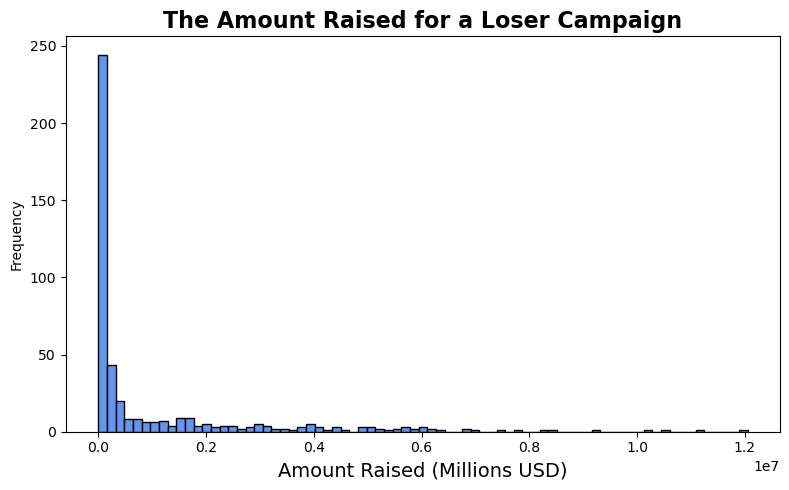

In [75]:
plt.figure(figsize = (8,5));
House_of_Rep_Losers['Raised'].plot(kind = 'hist', bins = 75, 
                                    edgecolor = 'black',
                                   color = 'cornflowerblue');
plt.xlabel('Amount Raised (Millions USD)', fontsize = 14);
plt.title('The Amount Raised for a Loser Campaign', fontsize = 16, fontweight = 'bold');
plt.tight_layout()
plt.savefig('../assets/AmountRaisedLosers.png', dpi = 150);

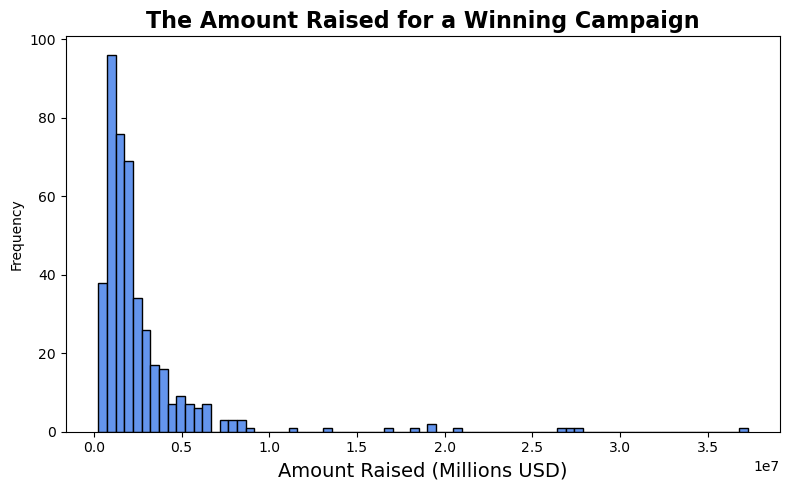

In [74]:
plt.figure(figsize = (8,5));
House_of_Rep_Winners['Raised'].plot(kind = 'hist', bins = 75, 
                                    edgecolor = 'black',
                                   color = 'cornflowerblue');
plt.xlabel('Amount Raised (Millions USD)', fontsize = 14);
plt.title('The Amount Raised for a Winning Campaign', fontsize = 16, fontweight = 'bold');
plt.tight_layout()
plt.savefig('../assets/AmountRaisedWinners.png', dpi = 150);

In [ ]:
gdp_2014['GDP_Per_Capita'].hist( bins = 50, edgecolor = 'black')

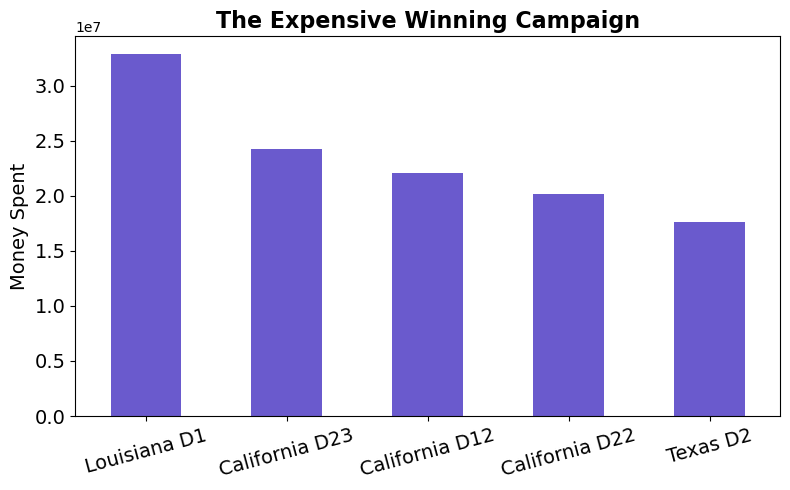

In [37]:
#The amount of candidates for each party
plt.figure(figsize = (8,5));
Expensive_Winner_Campaign['Spent'].plot(kind = 'bar', color = 'slateblue');
plt.xticks(rotation = 15, fontsize = 14, labels = ['Louisiana D1', 'California D23', 'California D12', 'California D22', 'Texas D2'], ticks = [0, 1, 2, 3, 4]);
plt.yticks(fontsize = 14);
plt.ylabel('Money Spent', fontsize = 14);
plt.title('The Expensive Winning Campaign', fontsize = 16, fontweight = 'bold');

plt.tight_layout()
plt.savefig('../assets/ExpensiveWinningCampaign.png', dpi = 150);

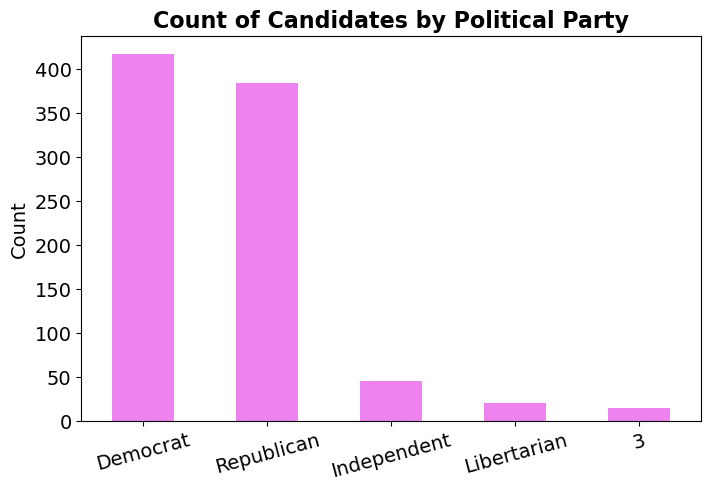

In [31]:
#The amount of candidates for each party
plt.figure(figsize = (8,5))
House_of_Rep['Party'].value_counts().plot(kind = 'bar', color = 'violet')
plt.xticks(rotation = 15, fontsize = 14, labels = ['Democrat', 'Republican', 'Independent', 'Libertarian', '3'], ticks = [0, 1, 2, 3, 4])
plt.yticks(fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of Candidates by Political Party', fontsize = 16, fontweight = 'bold');

In [23]:
#How much the winner spent on their campaign
House_of_Rep_Winners.groupby(['State', 'District'])['Spent'].sum().sort_values(ascending = False).reset_index()

,State,District,Spent
0,Louisiana,District 01,32830607
1,California,District 23,24265583
2,California,District 12,22064953
3,California,District 22,20156093
4,Texas,District 02,17596329
...,...,...,...
424,Maine,District 01,264790
425,California,District 32,251047
426,Alabama,District 05,210045
427,Indiana,District 04,190158


In [ ]:
#Most expensive campaign to the least expensive
House_of_Rep.sort_values('Spent', ascending = False).reset_index()

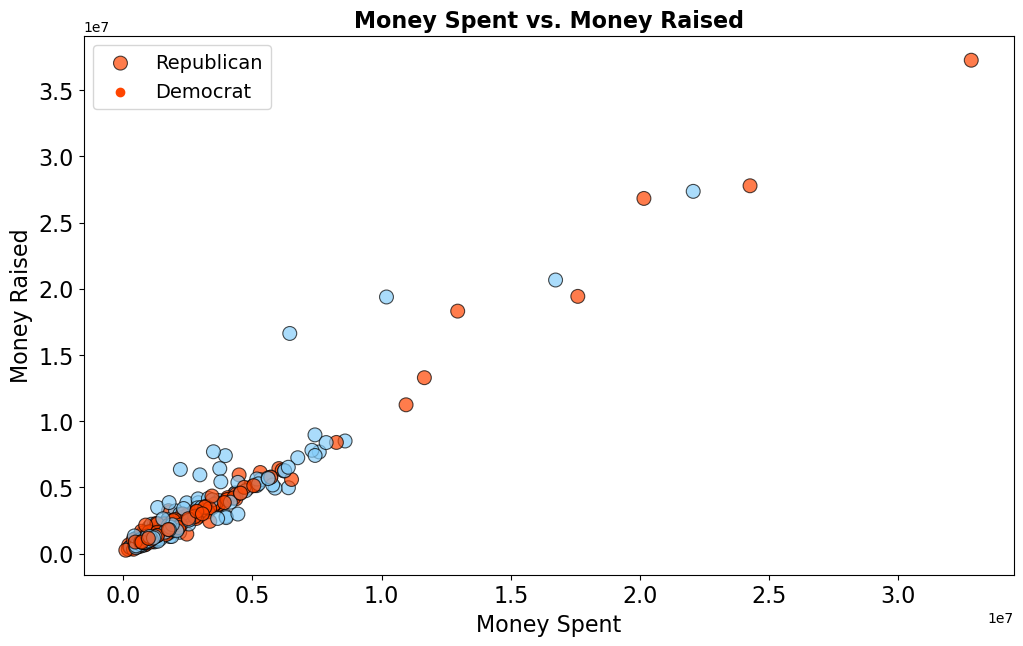

In [47]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = House_of_Rep_Winners, x = 'Spent', y = 'Raised', s = 100,
                hue = 'Party', palette = ['orangered', 'lightskyblue'],
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Money Spent', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Money Raised', fontsize = fontsize)
plt.title('Money Spent vs. Money Raised', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2, labels = ['Republican', 'Democrat']);

In [ ]:
District_Average_Raised = House_of_Rep.groupby(['State', 'District'])['Raised'].mean().reset_index()
District_Average_Raised

In [ ]:
House_of_Rep_Losers.groupby(['State'])['Raised'].sum().plot(kind = 'bar', color = 'slategray')


In [ ]:
House_of_Rep_Winners.groupby(['State'])['Raised'].sum().plot(kind = 'bar', color = 'slategray')


In [ ]:
House_of_Rep_Winners[['Candidate','State', 'District', 'Winner', 'Raised']]

In [ ]:
District_Total_Raised = House_of_Rep.groupby(['State', 'District'])['Raised'].sum().reset_index()
District_Total_Raised

In [ ]:
#The amount raised by the winners divided by the total amount raised in their district. 
District_Total_Raised['Winning Proportion'] = (House_of_Rep_Winners['Raised'])/(District_Total_Raised['Raised'])
District_Total_Raised

In [77]:
District_Total_Raised.groupby(['State'])['Winning Proportion'].mean().plot(kind = 'bar', color = 'slategray');

NameError: name 'District_Total_Raised' is not defined

In [85]:
House_of_Rep_Winners.sort_values('Raised')

,index,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
358,725,Patrick Fallon,(R),Texas,District 04,False,True,75.1,257174,95065,162109,1.0,True,1.0,True
150,302,Jim Baird,(R),Indiana,District 04,True,True,66.6,327727,190158,247371,1.0,True,1.0,True
349,705,Scott Desjarlais,(R),Tennessee,District 04,True,True,66.7,331464,392499,302649,1.0,True,1.0,True
109,218,Frederica Wilson,(D),Florida,District 24,True,True,75.6,412592,321019,420585,1.0,True,1.0,True
363,736,Al Green,(D),Texas,District 09,True,True,75.5,460332,486155,239806,1.0,True,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,535,Alexandria Ocasio-Cortez,(D),New York,District 14,True,True,68.7,20664795,16735422,4297383,1.0,True,1.0,True
42,77,Devin Nunes,(R),California,District 22,True,True,54.2,26825212,20156093,10908033,1.0,True,1.0,True
32,59,Nancy Pelosi,(D),California,District 12,True,True,77.6,27359508,22064953,6299373,1.0,True,1.0,True
43,79,Kevin McCarthy,(R),California,District 23,True,True,62.1,27780644,24265583,4802133,1.0,True,1.0,True


In [100]:
House_of_Rep[House_of_Rep['State'] == 'Texas'].head(10)

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
718,Louie Gohmert,(R),Texas,District 01,True,True,72.6,552915,580441,33662,2.0,False,2.0,False
719,Hank Gilbert,(D),Texas,District 01,False,False,27.4,968155,734411,233744,1.0,True,1.0,True
720,Dan Crenshaw,(R),Texas,District 02,True,True,55.6,19427865,17596329,1852715,1.0,True,1.0,True
721,Sima Ladjevardian,(D),Texas,District 02,False,False,42.8,3832697,3825287,7410,2.0,False,2.0,False
722,Elliott Scheirman,(L),Texas,District 02,False,False,1.6,15374,14296,-942,3.0,False,3.0,False
723,Van Taylor,(R),Texas,District 03,True,True,55.1,2655327,2825378,22498,1.0,True,1.0,True
724,Helane Seikaly,(D),Texas,District 03,False,False,42.9,1635185,1634843,342,2.0,False,2.0,False
725,Patrick Fallon,(R),Texas,District 04,False,True,75.1,257174,95065,162109,1.0,True,1.0,True
726,Tracy Shawn Jones,(I),Texas,District 04,False,False,0.4,13002,10595,2407,2.0,False,2.0,False
727,Lance Gooden,(R),Texas,District 05,True,True,62.0,1610327,1311983,452535,1.0,True,1.0,True


In [101]:
House_of_Rep[(House_of_Rep['State'] == 'Texas') & (House_of_Rep['District'] == 'District 04')]

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
725,Patrick Fallon,(R),Texas,District 04,False,True,75.1,257174,95065,162109,1.0,True,1.0,True
726,Tracy Shawn Jones,(I),Texas,District 04,False,False,0.4,13002,10595,2407,2.0,False,2.0,False


In [103]:
House_of_Rep_Winners.head(2)

,index,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True,1.0,True


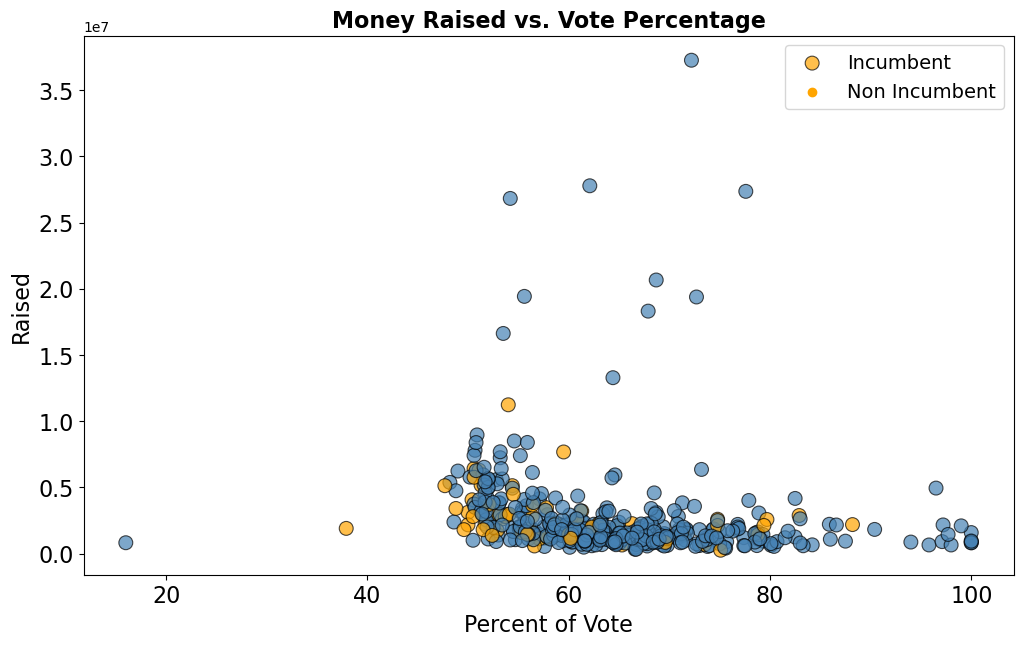

In [107]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = House_of_Rep_Winners, x = 'Percentage of Vote', y = 'Raised', s = 100,
                hue = 'Incumbent', palette = ['orange', 'steelblue'],
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Percent of Vote', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Raised', fontsize = fontsize)
plt.title('Money Raised vs. Vote Percentage', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2, labels = ['Incumbent', 'Non Incumbent']);

**Which political party raises the most money**

In [109]:
House_of_Rep.head(2)

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False,2.0,False


In [111]:
House_of_Rep.groupby(['Party'])['Raised'].sum()

Party
(3)       616828
(D)    891192342
(I)      5851046
(L)       241145
(R)    752458350
Name: Raised, dtype: int64

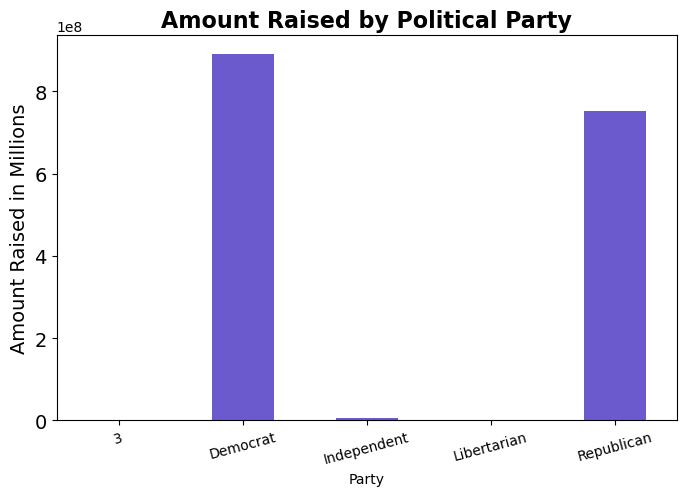

In [119]:
plt.figure(figsize = (8,5))
House_of_Rep.groupby(['Party'])['Raised'].sum().plot(kind = 'bar', color = 'slateblue')
plt.xticks(rotation = 15, fontsize = 10, labels = ['3', 'Democrat', 'Independent', 'Libertarian', 'Republican'], ticks = [0, 1, 2, 3, 4])
plt.yticks(fontsize = 14)
plt.ylabel('Amount Raised in Millions', fontsize = 14);
plt.title('Amount Raised by Political Party', fontsize = 16, fontweight = 'bold');

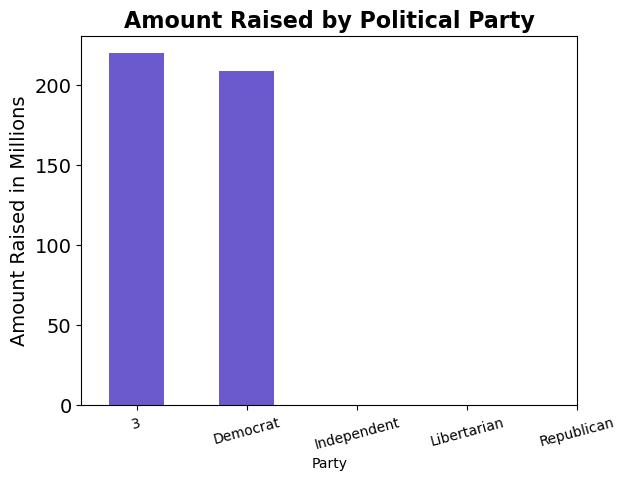

In [127]:
House_of_Rep_Winners.groupby(['Party'])['Winner'].count().plot(kind = 'bar', color = 'slateblue')
plt.xticks(rotation = 15, fontsize = 10, labels = ['3', 'Democrat', 'Independent', 'Libertarian', 'Republican'], ticks = [0, 1, 2, 3, 4])
plt.yticks(fontsize = 14)
plt.ylabel('Amount Raised in Millions', fontsize = 14);
plt.title('Amount Raised by Political Party', fontsize = 16, fontweight = 'bold');

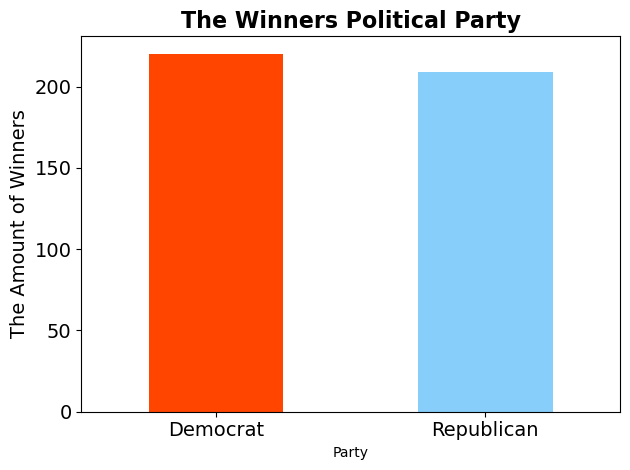

In [139]:
House_of_Rep_Winners.groupby(['Party'])['Winner'].count().plot(kind = 'bar', color = ['orangered', 'lightskyblue'])
plt.xticks(rotation = 0, fontsize = 14, labels = ['Democrat', 'Republican'], ticks = [0, 1])
plt.yticks(fontsize = 14)
plt.ylabel('The Amount of Winners', fontsize = 14);
plt.title('The Winners Political Party', fontsize = 16, fontweight = 'bold');
plt.tight_layout()
plt.savefig('../assets/WinnerspoliticalParty.png', dpi = 150);

In [145]:
House_of_Rep_Winners.groupby(['Party'])['Winner'].sum()

Party
(D)    220
(R)    209
Name: Winner, dtype: int64

In [143]:
220/(220 + 209)

0.5128205128205128

In [148]:
pearsonr(
    x=House_of_Rep_Winners['Party'],
    y=House_of_Rep_Winners['Winner']
)

PearsonRResult(statistic=nan, pvalue=nan)

In [149]:
House_of_Rep['Party'].value_counts(normalize = True)

(D)    0.472789
(R)    0.436508
(I)    0.051020
(L)    0.022676
(3)    0.017007
Name: Party, dtype: float64

In [150]:
House_of_Rep_Winners['Party'].value_counts(normalize = True)

(D)    0.512821
(R)    0.487179
Name: Party, dtype: float64

In [152]:
House_of_Rep_Losers['Party'].value_counts(normalize = True)

(D)    0.434879
(R)    0.388521
(I)    0.099338
(L)    0.044150
(3)    0.033113
Name: Party, dtype: float64

In [155]:
House_of_Rep.groupby('Party')['Raised'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
(3),15.0,4.112187e+04,6.359475e+04,281.0,4034.00,21394.0,55035.0,249583.0
(D),417.0,2.137152e+06,2.792651e+06,-2084.0,395934.00,1292084.0,2802093.0,27359508.0
(I),45.0,1.300232e+05,7.701962e+05,47.0,1750.00,6165.0,21261.0,5178452.0
(L),20.0,1.205725e+04,1.718435e+04,199.0,2332.75,8024.0,13676.5,75170.0
(R),385.0,1.954437e+06,3.425598e+06,144.0,175536.00,1245767.0,2271604.0,37262827.0


In [154]:
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False,2.0,False
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True,1.0,True
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False,2.0,False
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0,True,1.0,True


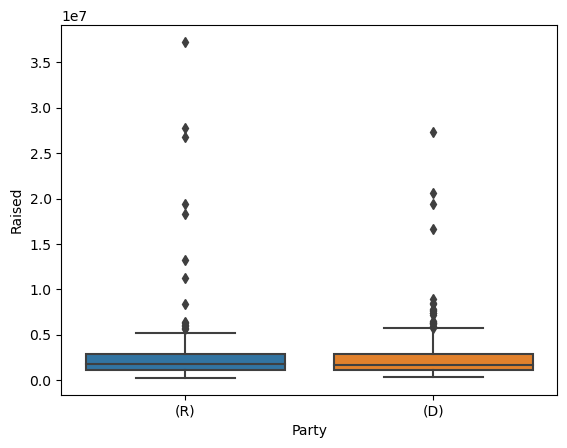

In [157]:
sns.boxplot(data = House_of_Rep_Winners,
           x = 'Party',
           y = 'Raised');

In [ ]:
lm = smf.ols('speed ~ year', data = derby).fit()
lm.summary()